In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [ ]:
df=pd.read_csv("telecom_customer_churn.csv")
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [3]:
df.shape

(7043, 38)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [5]:
df.drop(columns=['Customer ID'],inplace=True)

In [6]:
df.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                   

In [7]:
df.drop(columns=['Churn Category','Churn Reason'],inplace=True)
# Here I dropped these two columns as they had a lot of missing values.

Handling Missing Values

In [8]:
numerical_cols=['Avg Monthly Long Distance Charges','Avg Monthly GB Download']
categorical_cols=['Offer','Multiple Lines','Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']
for col in numerical_cols:
    df[col].fillna(df[col].mean(),inplace=True)
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\Prakhar\AppData\Local\Temp\ipykernel_8952\3308535955.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
C:\Users\Prakhar\AppData\Local\Temp\ipykernel_8952\3308535955.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Encoded all Categorical Variables

In [9]:
nominal_cols=['Gender','Married','Offer','Phone Service','Multiple Lines','Internet Service','Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Paperless Billing','Payment Method']
ordinal_cols=['Contract']
transformer=ColumnTransformer(transformers=[('tnf1',OrdinalEncoder(categories=[['Month-to-Month','One Year','Two Year']],dtype=int),ordinal_cols),('tnf2',OneHotEncoder(drop='first',sparse_output=False,dtype=int),nominal_cols)],remainder='passthrough')
transformer.fit(df)
transformer.set_output(transform="pandas")
df=transformer.transform(df)
df.head()

,tnf1__Contract,tnf2__Gender_Male,tnf2__Married_Yes,tnf2__Offer_Offer B,tnf2__Offer_Offer C,tnf2__Offer_Offer D,tnf2__Offer_Offer E,tnf2__Phone Service_Yes,tnf2__Multiple Lines_Yes,tnf2__Internet Service_Yes,...,remainder__Tenure in Months,remainder__Avg Monthly Long Distance Charges,remainder__Avg Monthly GB Download,remainder__Monthly Charge,remainder__Total Charges,remainder__Total Refunds,remainder__Total Extra Data Charges,remainder__Total Long Distance Charges,remainder__Total Revenue,remainder__Customer Status
0,1,0,1,1,0,0,0,1,0,1,...,9,42.39,16.0,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0,1,0,1,0,0,0,1,1,1,...,9,10.69,10.0,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0,1,0,0,0,0,1,1,0,1,...,4,33.65,30.0,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0,1,1,0,0,1,0,1,0,1,...,13,27.82,4.0,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0,0,1,1,0,0,0,1,0,1,...,3,7.38,11.0,83.9,267.40,0.00,0,22.14,289.54,Churned


In [10]:
df.drop(columns=['remainder__City'],inplace=True)

In [11]:
df=df[df['remainder__Customer Status']!='Joined']

In [12]:
le=LabelEncoder()
le.fit(df['remainder__Customer Status'])
df['remainder__Customer Status']=le.transform(df['remainder__Customer Status'])
df.head()

,tnf1__Contract,tnf2__Gender_Male,tnf2__Married_Yes,tnf2__Offer_Offer B,tnf2__Offer_Offer C,tnf2__Offer_Offer D,tnf2__Offer_Offer E,tnf2__Phone Service_Yes,tnf2__Multiple Lines_Yes,tnf2__Internet Service_Yes,...,remainder__Tenure in Months,remainder__Avg Monthly Long Distance Charges,remainder__Avg Monthly GB Download,remainder__Monthly Charge,remainder__Total Charges,remainder__Total Refunds,remainder__Total Extra Data Charges,remainder__Total Long Distance Charges,remainder__Total Revenue,remainder__Customer Status
0,1,0,1,1,0,0,0,1,0,1,...,9,42.39,16.0,65.6,593.30,0.00,0,381.51,974.81,1
1,0,1,0,1,0,0,0,1,1,1,...,9,10.69,10.0,-4.0,542.40,38.33,10,96.21,610.28,1
2,0,1,0,0,0,0,1,1,0,1,...,4,33.65,30.0,73.9,280.85,0.00,0,134.60,415.45,0
3,0,1,1,0,0,1,0,1,0,1,...,13,27.82,4.0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,0,1,1,0,0,0,1,0,1,...,3,7.38,11.0,83.9,267.40,0.00,0,22.14,289.54,0


In [13]:
df.corr()['remainder__Customer Status'].sort_values()

tnf2__Offer_Offer E                            -0.283144
tnf2__Internet Service_Yes                     -0.224121
tnf2__Paperless Billing_Yes                    -0.187702
remainder__Monthly Charge                      -0.168290
remainder__Age                                 -0.111174
tnf2__Internet Type_Fiber Optic                -0.095619
tnf2__Payment Method_Mailed Check              -0.067759
tnf2__Streaming TV_Yes                         -0.041210
tnf2__Streaming Movies_Yes                     -0.039030
tnf2__Streaming Music_Yes                      -0.025818
remainder__Longitude                           -0.025455
tnf2__Phone Service_Yes                        -0.014369
tnf2__Multiple Lines_Yes                       -0.013571
remainder__Total Extra Data Charges             0.000259
remainder__Avg Monthly Long Distance Charges    0.000421
tnf2__Gender_Male                               0.006373
tnf2__Offer_Offer D                             0.011405
remainder__Zip Code            

Creating Some Features To Improve Accuracy(Feature Creation)

In [14]:
df['contract_x_tenure']=df['tnf1__Contract']*df['remainder__Tenure in Months']
df['tenure_x_referrals']=df['remainder__Tenure in Months']*df['remainder__Number of Referrals']
df['security_bundle']=df['tnf2__Online Security_Yes']+df['tnf2__Online Backup_Yes']+df['tnf2__Premium Tech Support_Yes']

EDA

In [15]:
numerical_cols=['remainder__Age','remainder__Zip Code','remainder__Latitude','remainder__Longitude','remainder__Number of Referrals','remainder__Tenure in Months','remainder__Avg Monthly Long Distance Charges','remainder__Avg Monthly GB Download', 'remainder__Monthly Charge','remainder__Total Charges','remainder__Total Refunds','remainder__Total Extra Data Charges','remainder__Total Long Distance Charges','remainder__Total Revenue','contract_x_tenure','tenure_x_referrals']
categorical_cols=df.drop(columns=numerical_cols).columns

For Categorical Columns

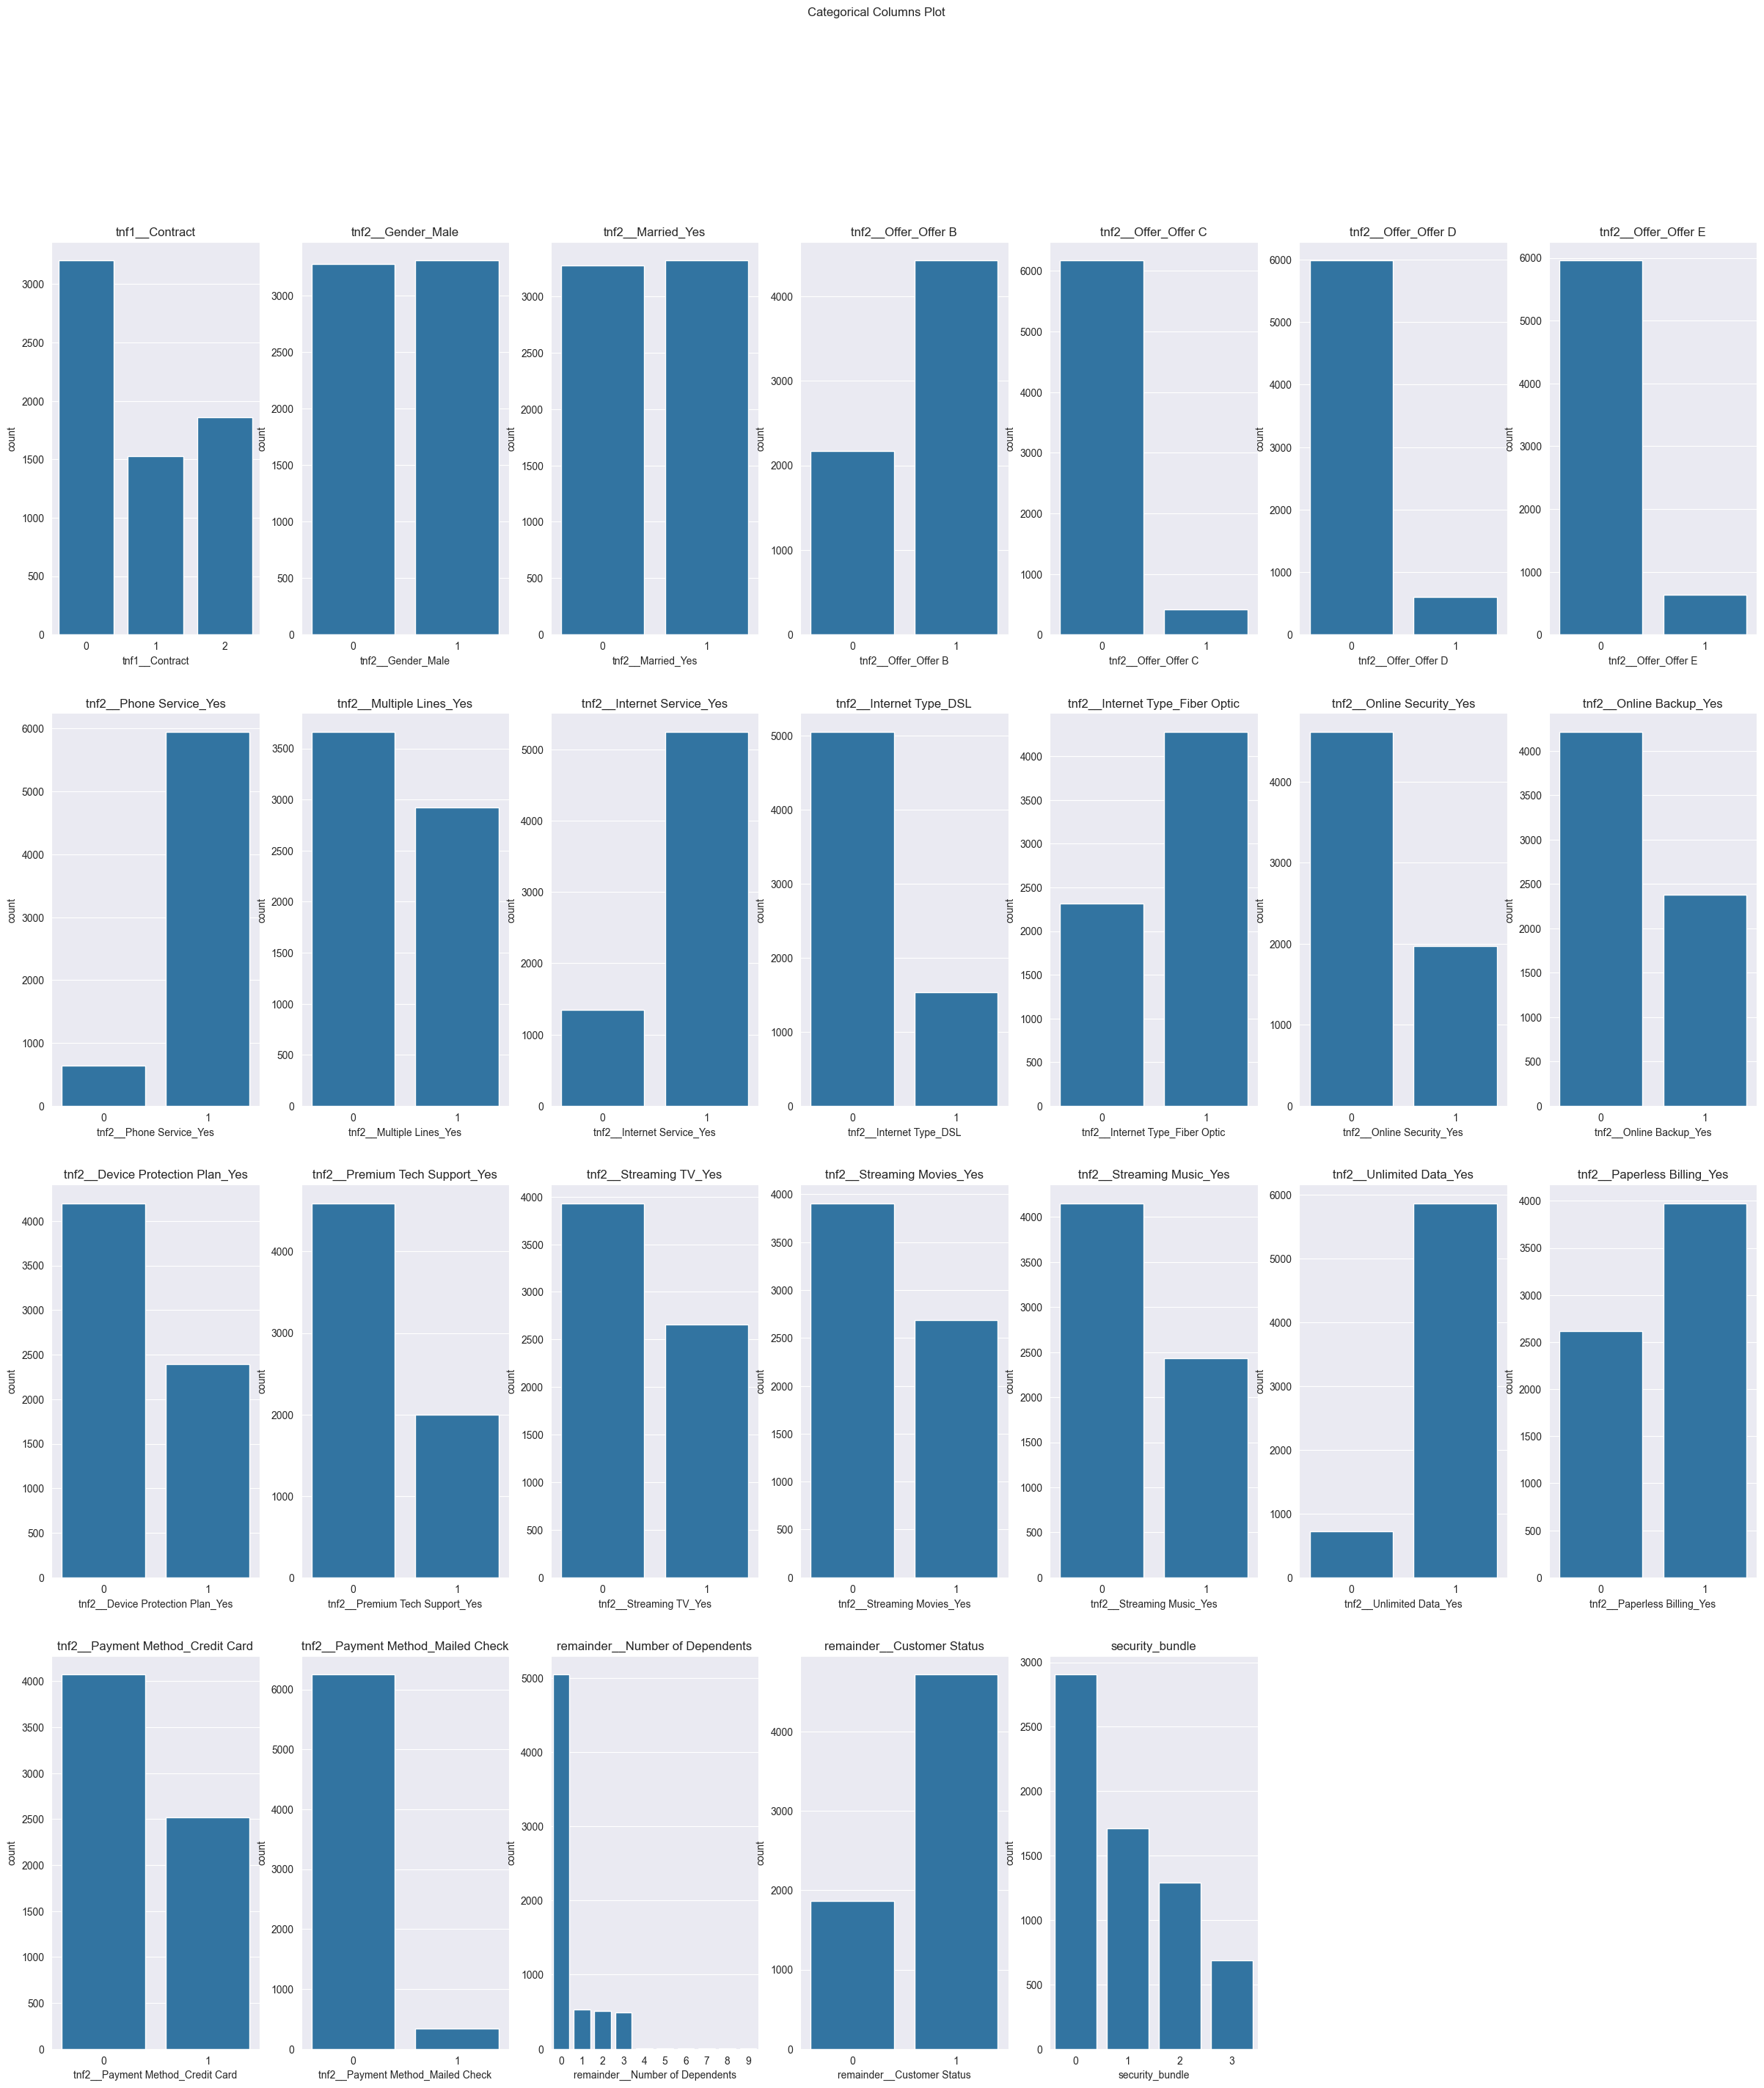

In [16]:
plt.figure(figsize=(30,32))
sns.set_style(style='darkgrid')
plt.suptitle("Categorical Columns Plot")

for i,cols in enumerate(categorical_cols,1):
    plt.subplot(4,7,i)
    sns.countplot(data=df,x=cols)
    plt.title(cols)

plt.show()

For Numerical Columns

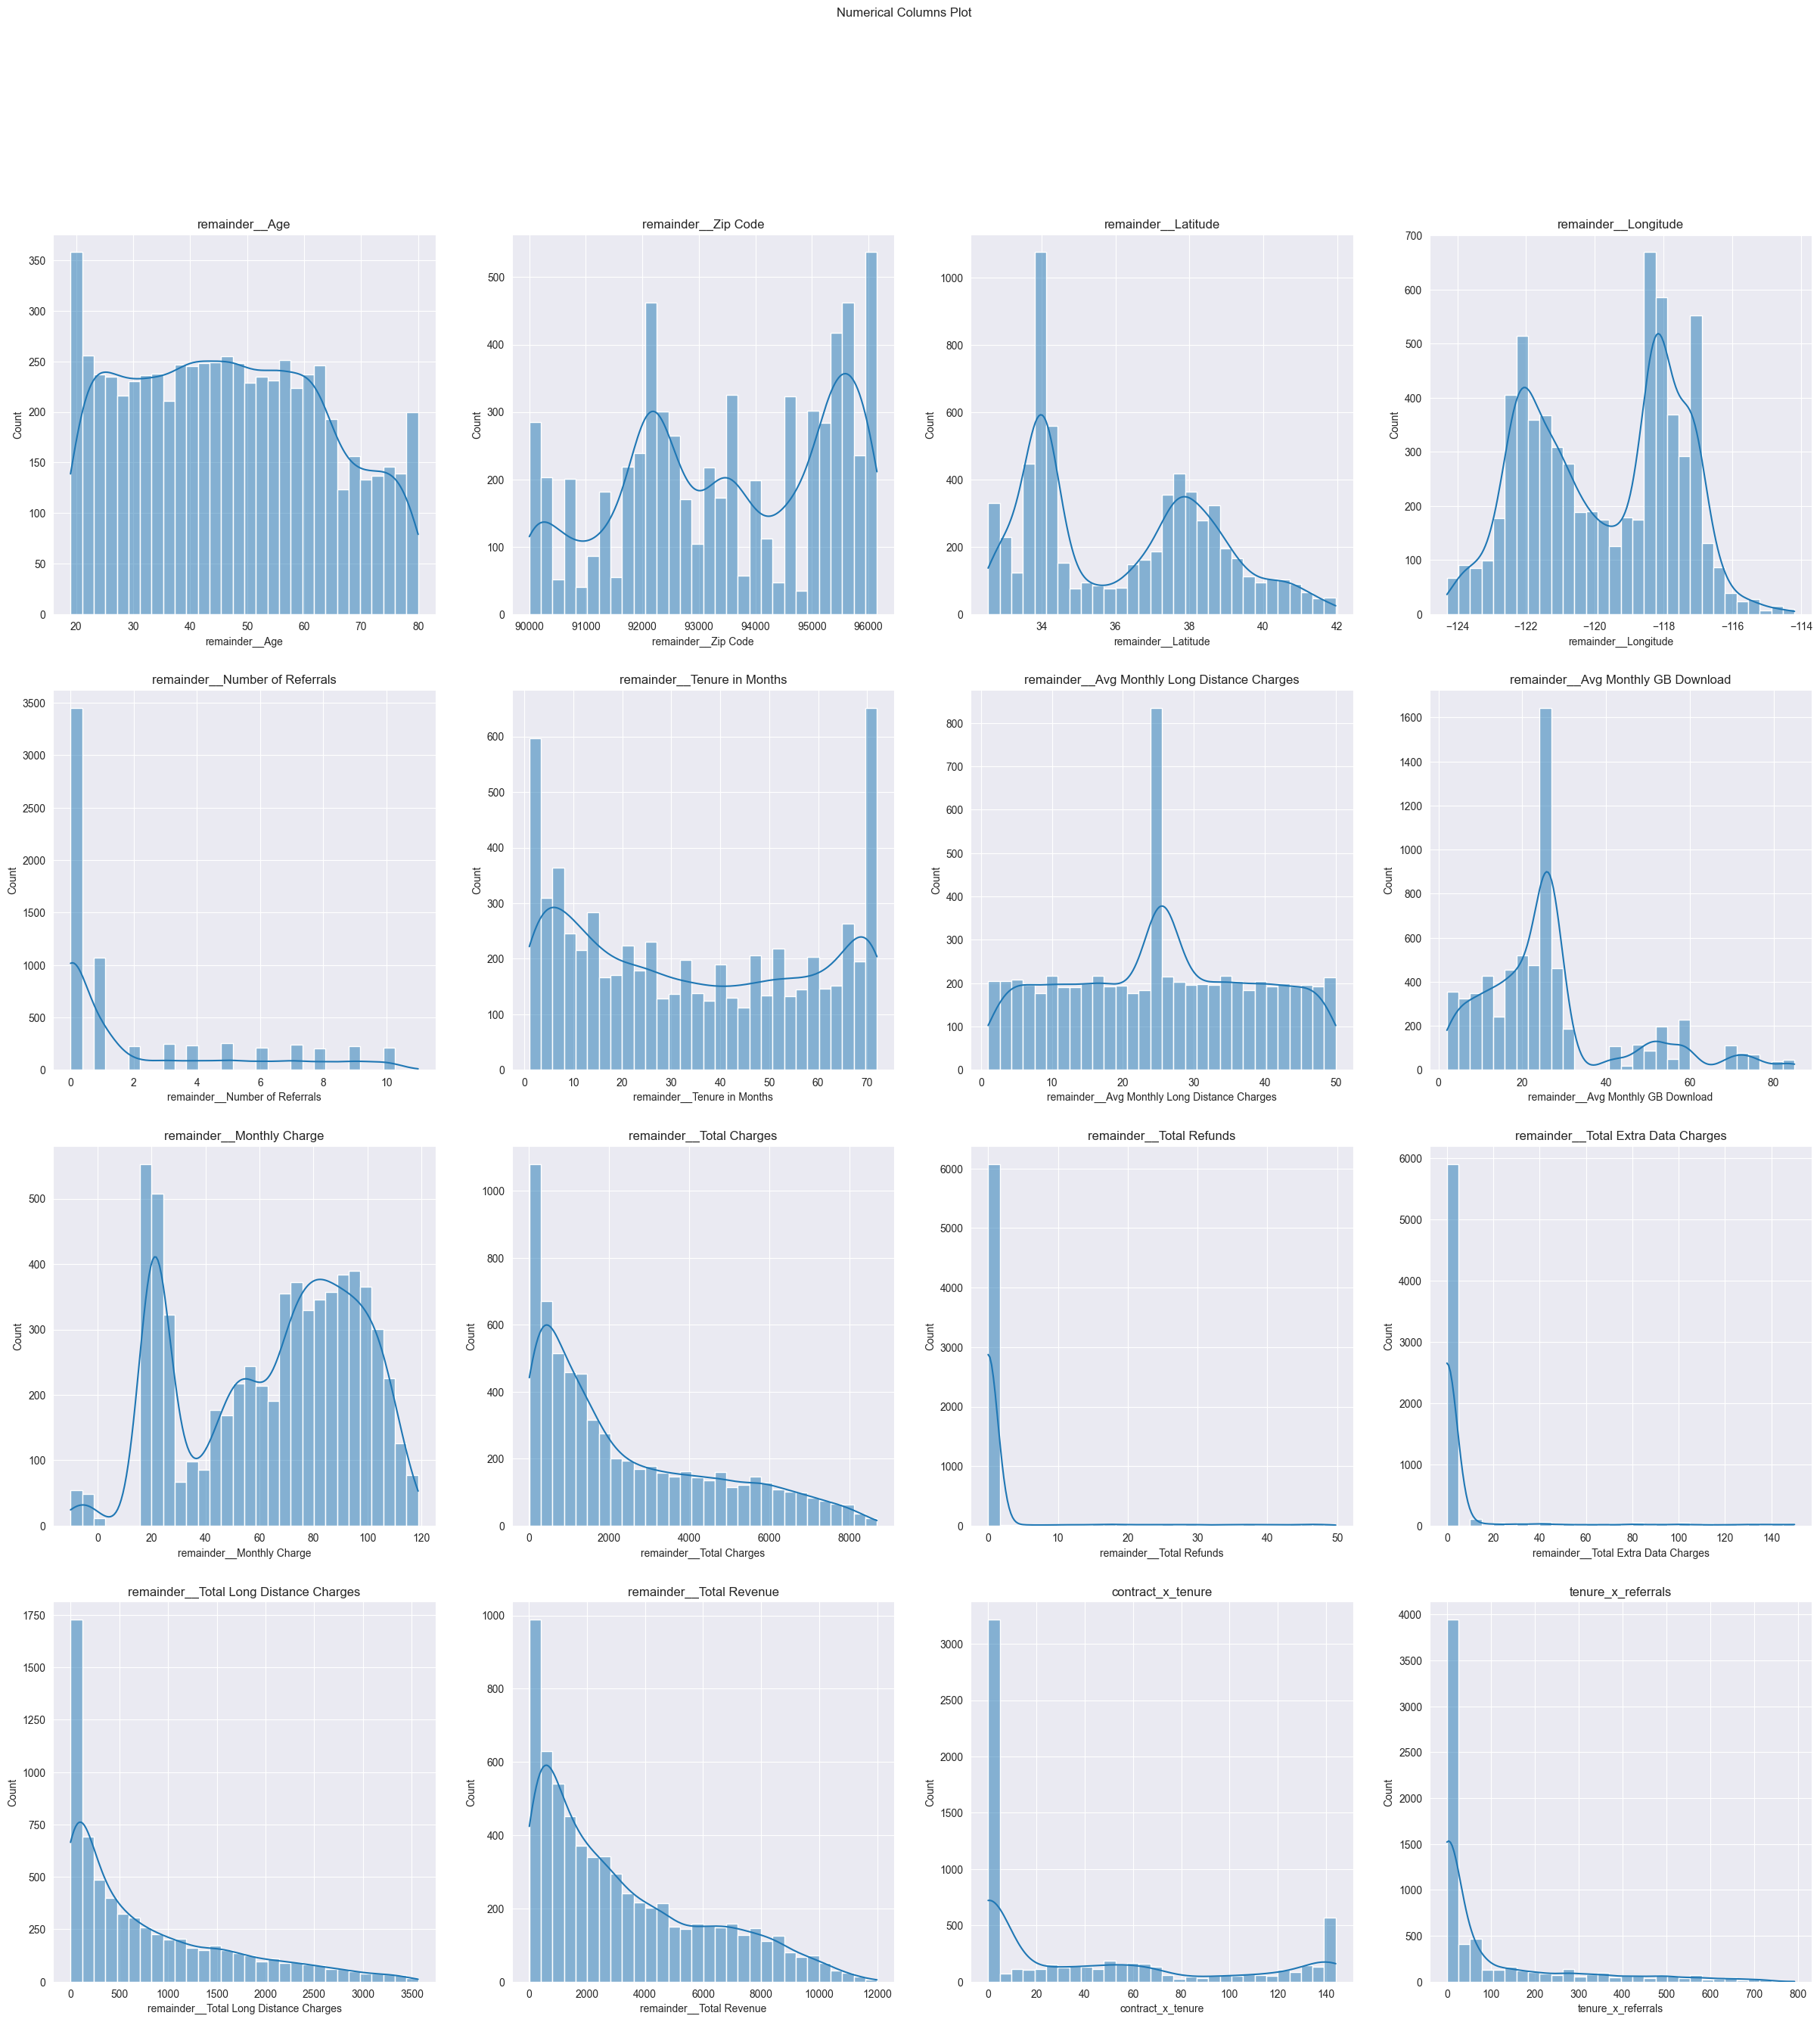

In [17]:
plt.figure(figsize=(30,30))
sns.set_style(style='darkgrid')
plt.suptitle("Numerical Columns Plot")

for i,cols in enumerate(numerical_cols,1):
    plt.subplot(4,4,i)
    sns.histplot(data=df,x=cols,bins=30,kde=True)
    plt.title(cols)

plt.show()

Correaltion Heatmap

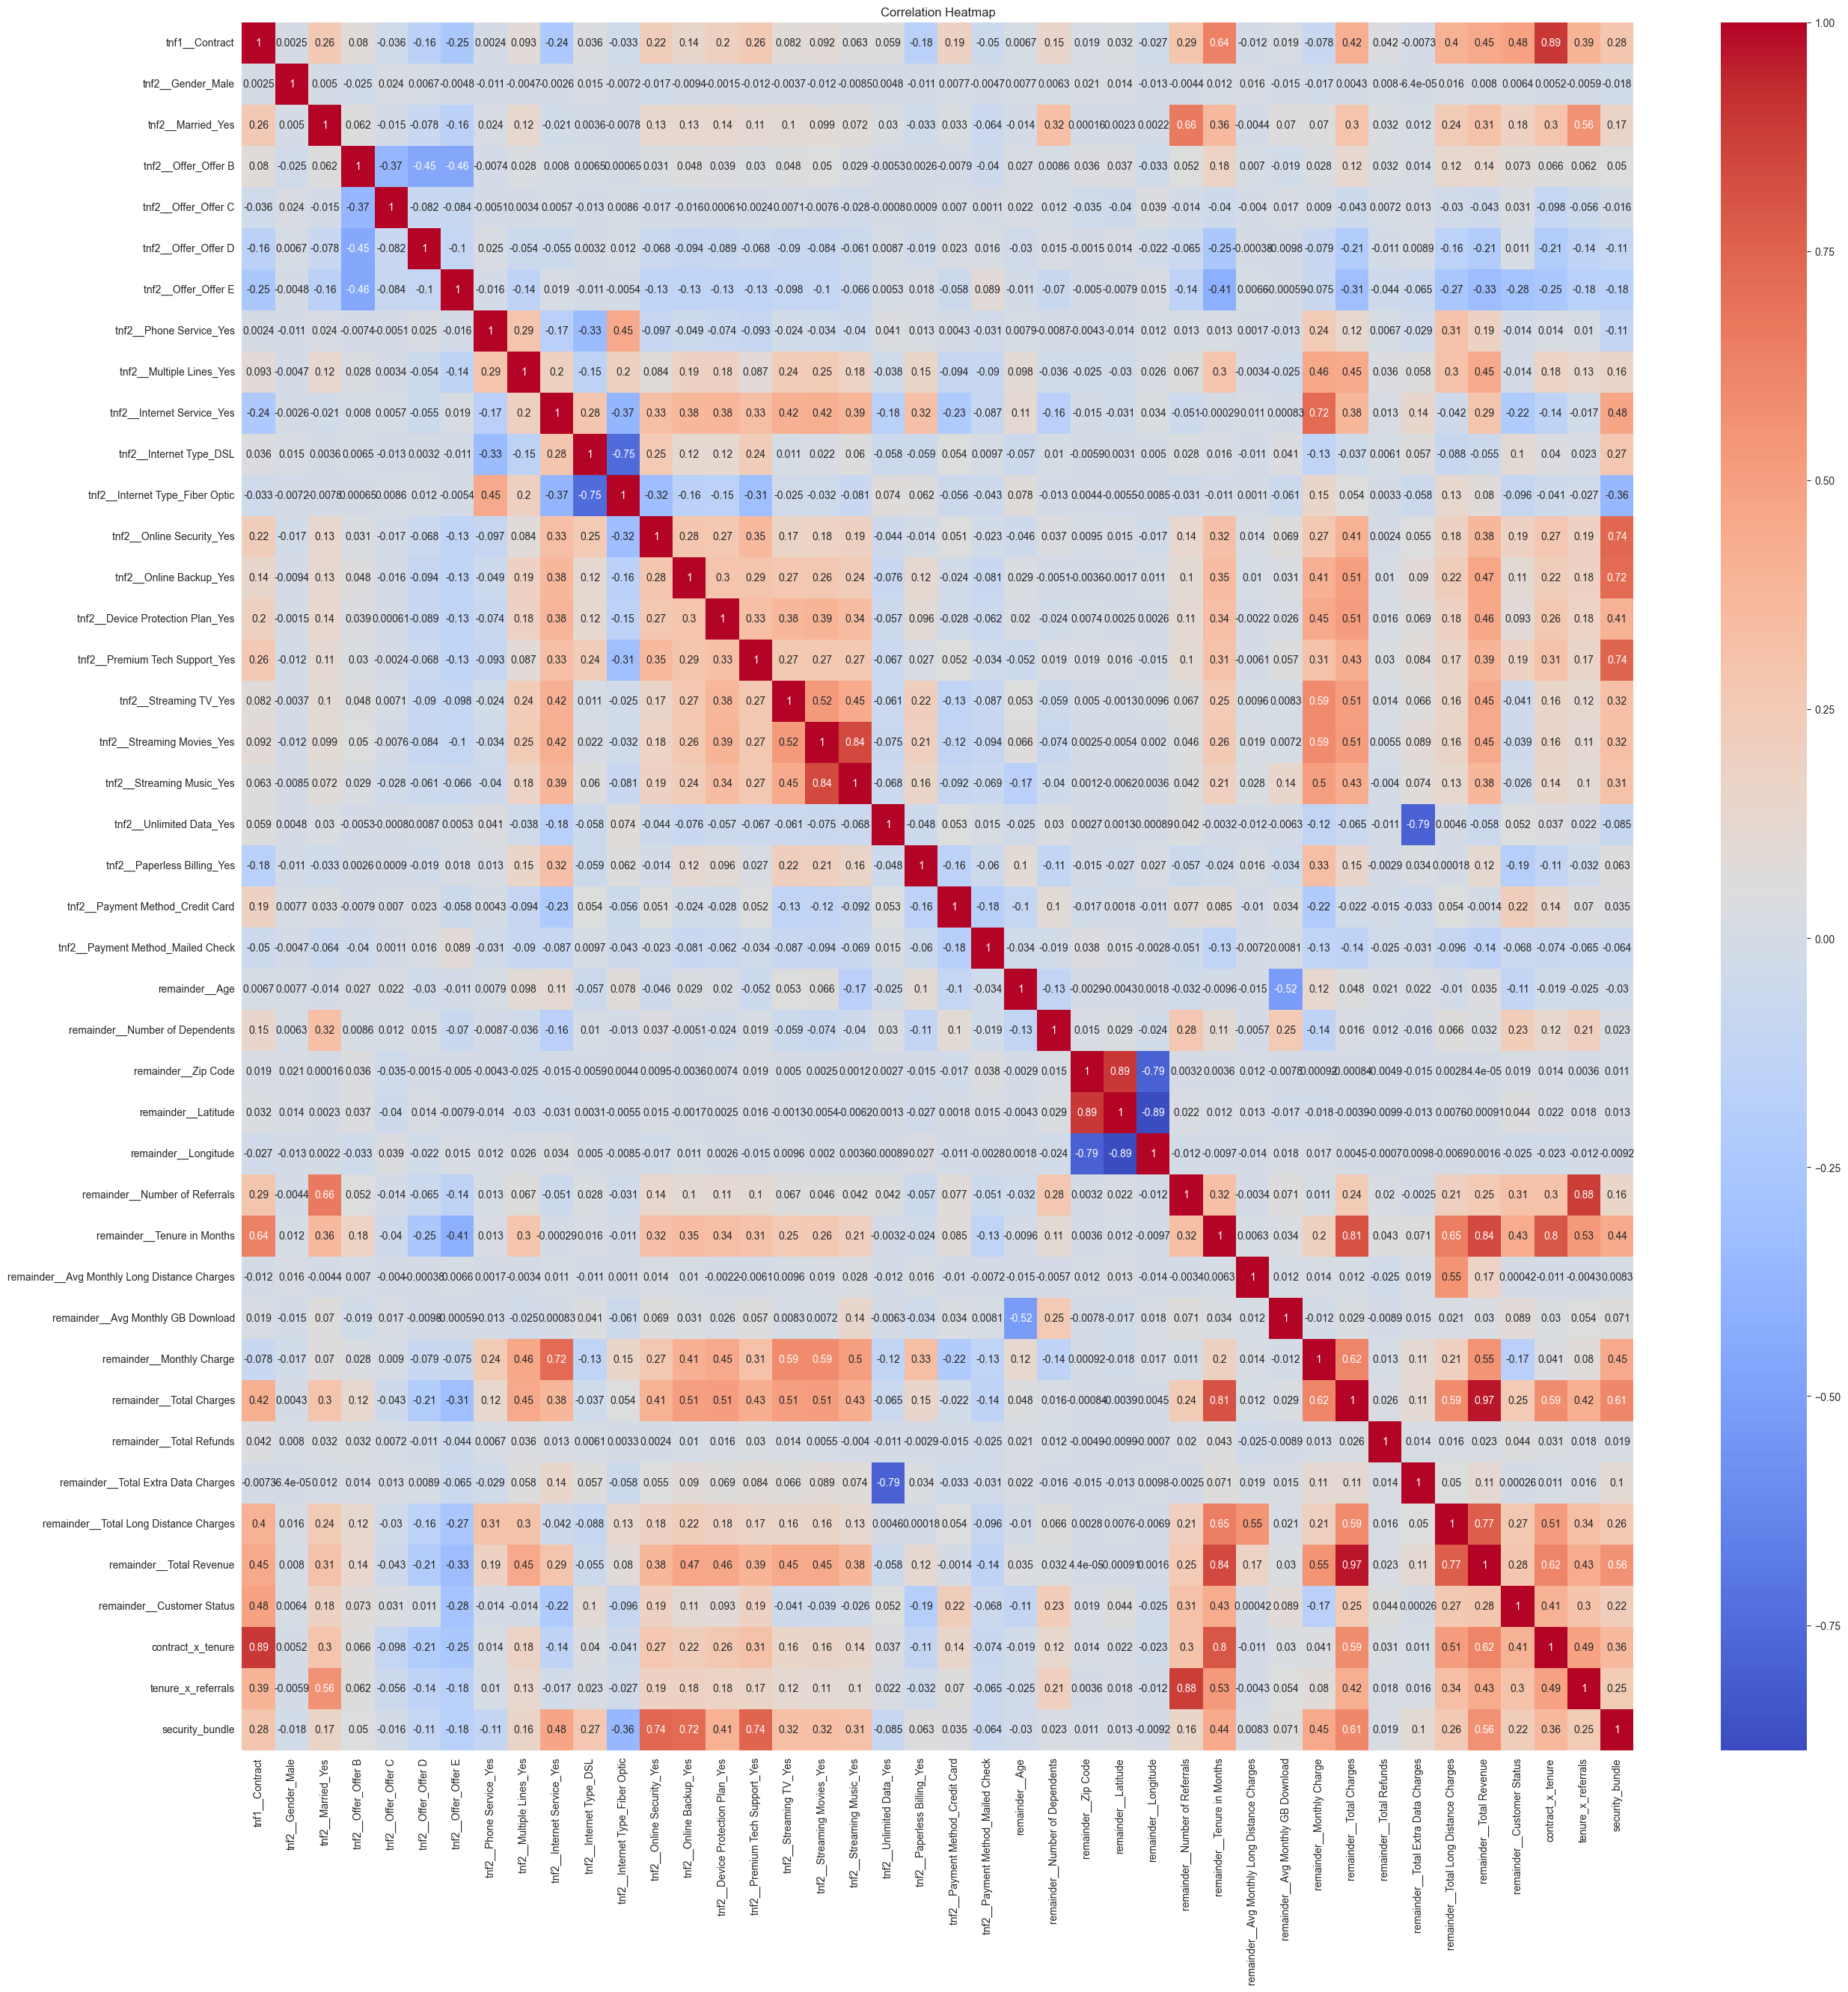

In [18]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
X=df.drop(columns=['remainder__Customer Status'])
y=df['remainder__Customer Status']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [21]:
model_rf=RandomForestClassifier() # I have checked all the other models and amongst all RandomForestClassifier performed best
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
y_pred_rf=model_rf.predict(X_test)

In [23]:
report=classification_report(y_test,y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       191
           1       0.89      0.96      0.92       468

    accuracy                           0.89       659
   macro avg       0.88      0.83      0.85       659
weighted avg       0.89      0.89      0.88       659



HyperparameterTuning RandomForestClassifier

In [24]:
parameters={'n_estimators':[200,300,500],'max_depth':[None,10,20,30],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,5],'max_features':['sqrt','log2'],'class_weight':['balanced']}
random_search=RandomizedSearchCV(estimator=model_rf,param_distributions=parameters,n_iter=30,scoring='accuracy',cv=5,n_jobs=-1,verbose=2)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 300, 500]},
                   scoring='accuracy', verbose=2)

In [25]:
model_rf=random_search.best_estimator_
model_rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       max_features='log2', min_samples_split=5,
                       n_estimators=200)

In [26]:
y_pred_rf=model_rf.predict(X_test)

In [ ]:
report=classification_report(y_test,y_pred_rf)
print(report)    # as we can see after tuning recall improved by 2% and accuracy improved by 1%

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       191
           1       0.90      0.96      0.93       468

    accuracy                           0.90       659
   macro avg       0.89      0.85      0.87       659
weighted avg       0.90      0.90      0.89       659

